4. Weak and strong connectivity


In [32]:
# algorithm for finding strongly connected components in directed networks
import networkx as nx

#read nodes and edges from the file
def get_nodes_and_edges(file_path):
    G = nx.DiGraph(name = 'enron')

    with open(file_path, 'r') as file:
        next(file)

        for line in file:
            if line.startswith('*arcs'): #found edges
                break
            node_id = line.split()
            G.add_node(int(node_id[0]) - 1, label = node_id[1])

        # Read arcs and edges
        for line in file:
            edge = line.split()
            first =  int(edge[0]) - 1
            second = int(edge[1]) - 1
            G.add_edge(first, second)
    return G


def dfs(node, graph, discovery, low, stack, result, time):
    discovery[node] = time
    low[node] = time
    time += 1
    stack.append(node)

    for neighbor in graph[node]:
        if discovery[neighbor] == -1:
            dfs(neighbor, graph, discovery, low, stack, result, time)
            low[node] = min(low[node], low[neighbor])
        elif neighbor in stack:
            low[node] = min(low[node], discovery[neighbor])

    if low[node] == discovery[node]:
        component = []
        while True:
            top = stack.pop()
            component.append(top)
            if top == node:
                break
        result.append(component)

def tarjan_scc(graph):
    discovery = {node: -1 for node in graph}
    low = {node: -1 for node in graph}
    stack = []
    result = []
    time = 0

    for node in graph:
        if discovery[node] == -1:
            dfs(node, graph, discovery, low, stack, result, time)

    return result


        
file_path = "enron.net"
G = get_nodes_and_edges(file_path)
comp = tarjan_scc(G)

#C = components(G)
num_conn_comp = len(comp)
m = G.number_of_edges
n = G.number_of_nodes
size_of_lar_conn_comp = max(len(c) for c in comp) 

print("{:>30s} | {:.1f}%".format('LCC', size_of_lar_conn_comp))
print("{:>30s} | {:,d}".format('# (weakly) con. components', num_conn_comp))


#number of  strongly connected components

#Size of the biggest one 

                           LCC | 8870.0%
    # (weakly) con. components | 78,335


In [19]:
# additional functions from labs
# This function identifies a connected component in a graph.
# A connected component is a subgraph in which any two vertices are connected to each other by paths.
def component(G, N, i):
    C = []
    S = []
    N.remove(i)
    S.append(i)
    while S:
        i = S.pop()
        C.append(i)
        for j in G[i]:
            if j in N:
                N.remove(j)
                S.append(j)
    return C

# This function identifies all connected components in a graph.
def components(G):
    C = []
    N = set(range(len(G)))
    while N:
        C.append(component(G, N, next(iter(N))))
    return C

def isolated(G, i):
    for j in G[i]:
        if j != i:
            return False
    return True

5. Is Java software scale-free?


{1: 452, 2: 380, 3: 452, 4: 376, 5: 275, 6: 242, 7: 127, 8: 142, 9: 126, 10: 76, 11: 60, 12: 30, 13: 21, 14: 9, 15: 13, 16: 11, 17: 9, 18: 5, 19: 12, 20: 12, 21: 4, 22: 5, 23: 12, 24: 6, 25: 3, 26: 6, 27: 3, 28: 1, 29: 4, 30: 2, 31: 3, 32: 4, 33: 1, 34: 3, 35: 1, 36: 2, 37: 2, 38: 4, 39: 5, 41: 2, 44: 2, 50: 1, 51: 2, 52: 3, 53: 1, 54: 1, 57: 1, 58: 1, 60: 1, 61: 2, 62: 1, 63: 1, 64: 1, 69: 1, 71: 1, 74: 1, 76: 1, 78: 1, 79: 2, 80: 1, 81: 1, 87: 2, 89: 1, 93: 1, 95: 1, 96: 2, 109: 1, 122: 1, 136: 1, 140: 1, 160: 1, 167: 1, 173: 1, 181: 1, 188: 1, 195: 2, 198: 1, 208: 1, 222: 1, 248: 1, 309: 1, 311: 1, 325: 1, 423: 1}
{0: 1967, 1: 342, 2: 176, 3: 89, 4: 67, 5: 40, 6: 28, 7: 20, 8: 23, 9: 14, 10: 15, 11: 8, 12: 12, 13: 11, 14: 8, 15: 6, 16: 5, 17: 2, 18: 2, 19: 4, 20: 4, 21: 9, 22: 7, 23: 5, 24: 3, 25: 2, 26: 4, 27: 5, 28: 2, 29: 3, 30: 3, 31: 1, 32: 1, 34: 2, 35: 5, 36: 5, 37: 3, 40: 1, 41: 1, 44: 1, 45: 1, 46: 1, 48: 1, 49: 2, 50: 1, 51: 1, 52: 1, 56: 1, 57: 1, 58: 2, 59: 1, 60: 3, 66:

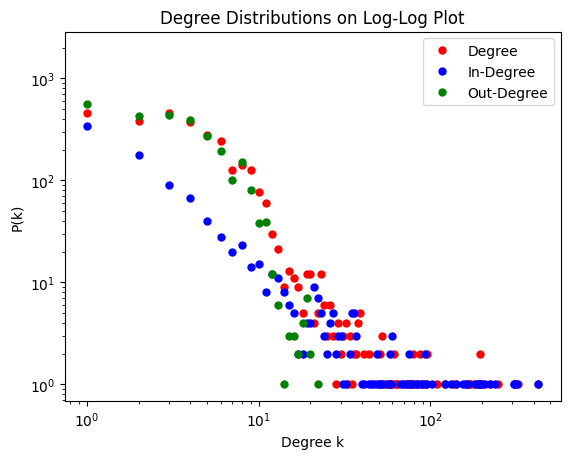

In [67]:
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np


def get_nodes_and_edges(file_path):
    G = nx.DiGraph(name = 'enron')

    with open(file_path, 'r') as file:
        next(file)

        for line in file:
            if line.startswith('*arcs'): #found edges
                break
            node_id = line.split()
            G.add_node(int(node_id[0]) - 1, label = node_id[1])

        # Read arcs and edges
        for line in file:
            edge = line.split()
            first =  int(edge[0]) - 1
            second = int(edge[1]) - 1
            G.add_edge(first, second)
    return G

def get_degree_distribution(G):
    degree_dist = {}
    for degree in G.degree():
        node, deg = degree
        if deg in degree_dist:
           degree_dist[deg] += 1
        else:
           degree_dist[deg] = 1
    
    sorted_degrees = {key: degree_dist[key] for key in sorted(degree_dist)}
    #print(sorted_degrees)
    return sorted_degrees

def get_in_degree_distribution(G):
    degree_dist = {}
    for degree in G.in_degree():
        node, deg = degree
        if deg in degree_dist:
           degree_dist[deg] += 1
        else:
           degree_dist[deg] = 1
    
    sorted_degrees = {key: degree_dist[key] for key in sorted(degree_dist)}
    #print(sorted_degrees)
    return sorted_degrees

def get_out_degree_distribution(G):
    degree_dist = {}
    for degree in G.out_degree():
        node, deg = degree
        if deg in degree_dist:
           degree_dist[deg] += 1
        else:
           degree_dist[deg] = 1
    
    sorted_degrees = {key: degree_dist[key] for key in sorted(degree_dist)}
    #print(sorted_degrees)
    return sorted_degrees

def calculate_power_law_exponent(degree_distribution,n, k_min, sum_ln, nodes_accounted):
    for degree in degree_distribution.items():
        k, p = degree
        if k >= k_min:
            sum_ln += np.log(k/(k_min - 0.5)) * p
            nodes_accounted += p
    gamma = 1 + nodes_accounted /(sum_ln)

    return gamma



#compute degree distribution,in-degree distribution pk in and the out-degree distribution pkout,
file_path = "lucene.net"
G =get_nodes_and_edges(file_path)
degree_distribution = get_degree_distribution(G)
in_degree_distribution = get_in_degree_distribution(G)
out_degree_distribution = get_out_degree_distribution(G)
gamma_degree = calculate_power_law_exponent(in_degree_distribution, len(G.nodes), 6,0,0 )
print(gamma_degree)

#plot the degree distribution (in log), superimpose them on the same plot using dots of different colors
plt.loglog(degree_distribution.keys(), degree_distribution.values(), 'ro', label='Degree', linestyle='None', markersize=5)
plt.loglog(in_degree_distribution.keys(), in_degree_distribution.values(), 'bo', label='In-Degree', linestyle='None', markersize=5)
plt.loglog(out_degree_distribution.keys(), out_degree_distribution.values(), 'go', label='Out-Degree', linestyle='None', markersize=5)

plt.title('Degree Distributions on Log-Log Plot')
plt.xlabel('Degree k')
plt.ylabel('P(k)')
plt.legend()

# Show the plot
plt.show()




6. Five network problem


{1: 135333, 2: 34066, 3: 19690, 4: 11517, 5: 8137, 6: 7612, 7: 8467, 8: 9290, 9: 5017, 10: 5533, 11: 5486, 12: 3595, 13: 3703, 14: 2804, 15: 2387, 16: 2600, 17: 1646, 18: 1264, 19: 1167, 20: 994, 21: 840, 22: 721, 23: 703, 24: 570, 25: 526, 26: 656, 27: 487, 28: 410, 29: 336, 30: 471, 31: 318, 32: 561, 33: 274, 34: 485, 35: 257, 36: 174, 37: 320, 38: 596, 39: 190, 40: 146, 41: 145, 42: 129, 43: 105, 44: 94, 45: 107, 46: 135, 47: 104, 48: 401, 49: 108, 50: 456, 51: 101, 52: 124, 53: 61, 54: 822, 55: 114, 56: 294, 57: 61, 58: 93, 59: 98, 60: 313, 61: 179, 62: 552, 63: 71, 64: 299, 65: 64, 66: 25, 67: 37, 68: 577, 69: 64, 70: 44, 71: 48, 72: 51, 73: 47, 74: 333, 75: 41, 76: 25, 77: 37, 78: 657, 79: 41, 80: 14, 81: 17, 82: 24, 83: 23, 84: 32, 85: 12, 86: 371, 87: 30, 88: 22, 89: 16, 90: 404, 91: 25, 92: 25, 93: 17, 94: 14, 95: 21, 96: 21, 97: 25, 98: 21, 99: 14, 100: 16, 101: 19, 102: 432, 103: 27, 104: 20, 105: 25, 106: 466, 107: 24, 108: 9, 109: 13, 110: 470, 111: 19, 112: 12, 113: 4, 11

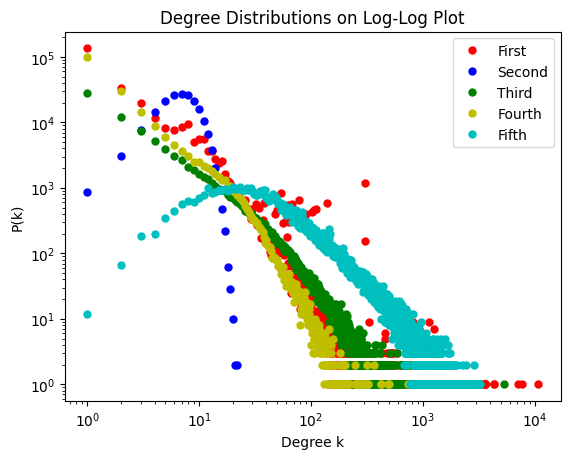

In [88]:
#Figure out which network is which

def get_nodes_and_edges_pajek(file_path, name):
    G = nx.DiGraph(name = name)

    with open(file_path, 'r') as file:
        next(file)

        for line in file:
            if not line.startswith('#'): #ignore first four lines
                node_one, node_two = line.split()
                G.add_edge(node_one, node_two)
    return G
G_first = get_nodes_and_edges_pajek("network_1.adj", "network_1.adj")
G_second = get_nodes_and_edges_pajek("network_2.adj", "network_2.adj")
G_third = get_nodes_and_edges_pajek("network_3.adj", "network_3.adj")
G_fourth = get_nodes_and_edges_pajek("network_4.adj", "network_4.adj")
G_fifth = get_nodes_and_edges_pajek("network_5.adj", "network_5.adj")

def is_directed_graph(G): # check if the number of edges in the directed vs undirected is the same
    nu_directed = G.number_of_edges()
    nu_undirected = (G.to_undirected()).number_of_edges()
    return nu_directed == nu_undirected


# networks = [G_first, G_second, G_third, G_fourth, G_fifth]
# for G in networks: 
#     # Get the number of nodes in the graph.
#     n = G.number_of_nodes()
#     # Get the number of edges in the graph.
#     m = G.number_of_edges()
#     avg_k = 2 * m / n
#     density = 2 * m / n / (n - 1)
#     G = G.to_undirected()

#     components = list(nx.connected_components(G))
#     num_comp = len(components)
#     lcc = 100 * max(len(c) for c in components) / nx.number_of_nodes(G)
#     #clust = nx.average_clustering(G)


#     print(f"Number of Nodes': {n}\n'Number of Edges': {m}\n'Average Degree': {avg_k}\n'Density': {density}\n'Number of Connected Components': {num_comp}\n'Size of Largest Connected Component': {str(lcc)}")
#     print()
#     #print(f"nx coefficient: {clust:.2f}")

first_degree_distribution = get_degree_distribution(G_first)
second_degree_distribution = get_degree_distribution(G_second)
third_degree_distribution = get_degree_distribution(G_third)
fourth_degree_distribution = get_degree_distribution(G_fourth)
fifth_degree_distribution = get_degree_distribution(G_fifth)

# print(f"clustering coefficient: {nx.average_clustering(G_first):.2f}")
# print(f"clustering coefficient: {nx.average_clustering(G_second):.2f}")
# print(f"clustering coefficient: {nx.average_clustering(G_third):.2f}")
# print(f"clustering coefficient: {nx.average_clustering(G_fourth):.2f}")
# print(f"clustering coefficient: {nx.average_clustering(G_fifth):.2f}")



#plot the degree distribution (in log), superimpose them on the same plot using dots of different colors
plt.loglog(first_degree_distribution.keys(), first_degree_distribution.values(), 'ro', label='First', linestyle='None', markersize=5)
plt.loglog(second_degree_distribution.keys(), second_degree_distribution.values(), 'bo', label='Second', linestyle='None', markersize=5)
plt.loglog(third_degree_distribution.keys(), third_degree_distribution.values(), 'go', label='Third', linestyle='None', markersize=5)
plt.loglog(fourth_degree_distribution.keys(), fourth_degree_distribution.values(), 'yo', label='Fourth', linestyle='None', markersize=5)
plt.loglog(fifth_degree_distribution.keys(), fifth_degree_distribution.values(), 'co', label='Fifth', linestyle='None', markersize=5)


plt.title('Degree Distributions on Log-Log Plot')
plt.xlabel('Degree k')
plt.ylabel('P(k)')
plt.legend()

# Show the plot
plt.show()


In [ ]:
#functions from labs
def avg_clustering(G: nx.Graph) -> float:
    neighbor_set = {i: set(G.neighbors(i)) for i in G}

    def triangles_between(low_deg_node: int, high_deg_node: int) -> int:
        t = 0
        for k in G[low_deg_node]:
            t += k in neighbor_set[high_deg_node]
        return t

    def triangles_around(i: int) -> int:
        t = 0
        for j in G[i]:
            if G.degree[i] <= G.degree[j]:
                t += triangles_between(i, j)
            else:
                t += triangles_between(j, i)

        return t / 2 # double counting

    def node_clustering(i: int) -> float:
        k = G.degree[i]
        if k <= 1:
            return 0
        else:
            return triangles_around(i) * 2 / (k*k - k)

    return np.mean([node_clustering(i) for i in G])